In [12]:
import tensorflow as tf

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape to include channel dimension (grayscale → 1 channel)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("Training shape:", x_train.shape)
print("Test shape:", x_test.shape)


Training shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


In [5]:
from tensorflow.keras import layers, models

model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Layer 1
    layers.MaxPooling2D((2, 2)),                                            # Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),                           # Layer 3
    layers.Flatten(),                                                       # Layer 4
    layers.Dense(10, activation='softmax')                                  # Layer 5
])

model_cnn.summary()


c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        77,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,266 (376.04 KB)

 Trainable params: 96,266 (376.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ CNN compiled successfully")


✅ CNN compiled successfully


In [7]:
history_cnn = model_cnn.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 26ms/step - accuracy: 0.9171 - loss: 0.2798 - val_accuracy: 0.9815 - val_loss: 0.0559
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9858 - loss: 0.0446 - val_accuracy: 0.9870 - val_loss: 0.0410
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9902 - loss: 0.0298 - val_accuracy: 0.9889 - val_loss: 0.0330
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9928 - loss: 0.0217 - val_accuracy: 0.9909 - val_loss: 0.0291
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9952 - loss: 0.0147 - val_accuracy: 0.9872 - val_loss: 0.0436


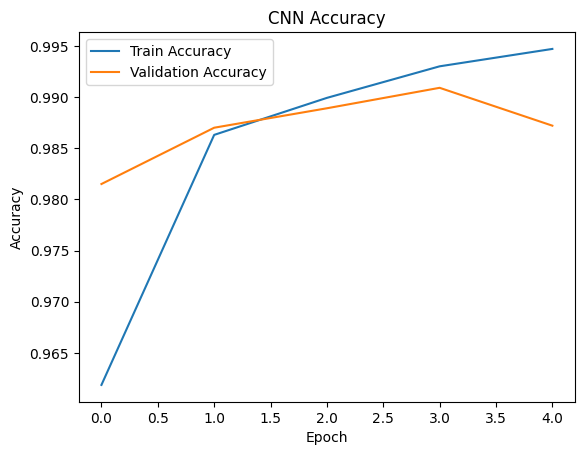

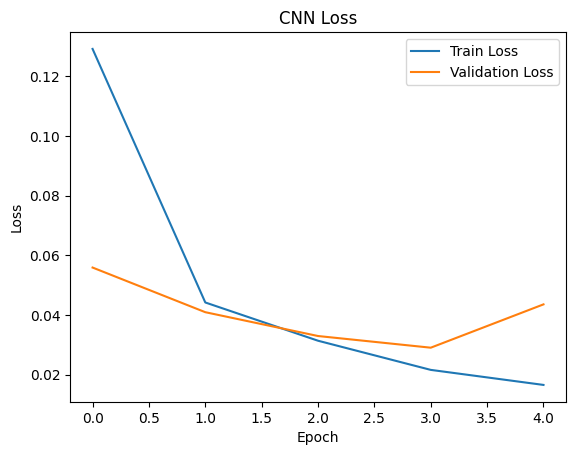

In [8]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Loss plot
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [9]:
test_loss, test_acc = model_cnn.evaluate(x_test, y_test)
print(f"✅ CNN Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9833 - loss: 0.0556
✅ CNN Test Accuracy: 0.9872


In [13]:
model_cnn.save('mnist_cnn_model.h5')
print("✅ Model saved as mnist_cnn_model.h5")


✅ Model saved as mnist_cnn_model.h5


In [14]:

from tensorflow.keras.models import load_model

loaded_model = load_model('mnist_cnn_model.h5')
print("✅ Model loaded successfully")


✅ Model loaded successfully


In [15]:
predictions = loaded_model.predict(x_test)
import numpy as np

predicted_labels = np.argmax(predictions, axis=1)
print(predicted_labels[:10])  # Show first 10 predicted digits


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
[7 2 1 0 4 1 4 9 5 9]
